

##Importation des librairies et dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_csv('/content/drive/My Drive/dataset.csv')

##Analyse des données

###Echantillon de la data

Pour examiner les données de plus près, nous utilisons la fonction " .head() " de la bibliothèque pandas qui renvoie les cinq premières observations de l'ensemble des données.

In [ ]:
df.head()

,height,width,depth,weight,activity
0,90.5,42.0,2.0,1.25,mlp
1,60.0,50.0,2.0,1.20,mlp
2,80.0,59.6,2.0,7.40,mlp
3,46.0,46.0,2.0,1.45,mlp
4,93.0,21.0,2.0,1.30,mlp


### Forme du dataset

In [ ]:
print('The shape of our features is:', df.shape)

The shape of our features is: (900, 5)


--> On a 900 lignes pour 5 colonnes dans le **dataset** 

###Informations

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   height    900 non-null    float64
 1   width     900 non-null    float64
 2   depth     900 non-null    float64
 3   weight    900 non-null    float64
 4   activity  900 non-null    object 
dtypes: float64(4), object(1)
memory usage: 35.3+ KB


Les informations qu'on peut extraire :
*   900 entrées
*   5 colonnes
*   4 colonnes sont type "float" et une de type "object"
*   On a pas de données manquantes dans notre dataset , pas de NULL


La fonction describe() de pandas est très pratique pour obtenir diverses statistiques.
Elle renvoie le nombre, la moyenne, l'écart-type, les valeurs minimales et maximales et les quantiles des données.

In [ ]:
df.describe()

,height,width,depth,weight
count,900.000000,900.000000,900.000000,900.000000
mean,76.500333,81.840889,43.665222,17.338164
std,48.964657,64.233793,50.582235,38.186996
min,1.600000,7.000000,1.200000,1.010000
25%,42.375000,39.000000,8.750000,1.915000
50%,74.000000,60.000000,32.000000,4.600000
75%,90.000000,100.000000,51.250000,14.000000
max,300.000000,370.000000,350.000000,800.000000


###Les données dupliquées


Dans cette partie on peut verifier si on a des entrées dupliquées et les supprimer

In [ ]:
# générer des statistiques de comptage des entrées dupliquées
if len(df[df.duplicated()]) > 0:
    print("Nombres d'entrées dupliquées ", len(df[df.duplicated()]))
    print(df[df.duplicated()])
    #Supprimer les duplications
    df.drop_duplicates(inplace=True)
    print('shape du dataset aprés la suppression:', df.shape)
else:
    print("PAS d'entrées dupliquées ")

Nombres d'entrées dupliquées  18
     height  width  depth  weight activity
46     31.0   45.0    4.0     1.1      mlp
53     31.0   45.0    4.0     1.1      mlp
256    42.0   35.0   35.0     4.1      mlp
659    76.0   50.0   50.0     5.5   meuble
662    50.0   52.0   52.0     5.0   meuble
664    50.0   52.0   52.0     5.0   meuble
672    78.0   51.0   58.0     5.2   meuble
691    88.0  186.0   96.0    61.0   meuble
712    88.0  255.0  257.0   109.0   meuble
738    48.0   74.0   97.0    18.0   meuble
741    88.0  182.0  101.0    98.0   meuble
757    88.0  255.0  262.0   141.0   meuble
758    88.0  255.0  262.0   141.0   meuble
831    72.0   70.0   70.0     8.0   meuble
855    85.0  280.0  189.0   134.0   meuble
856    85.0  280.0  189.0   112.0   meuble
884   114.0   77.0  115.0    10.0   meuble
888    86.0  294.0  190.0   118.0   meuble
shape du dataset aprés la suppression: (882, 5)


###Données catégorielles

les valeurs de notre target(activity) :

In [ ]:
df.activity.unique()

array(['mlp', 'deco', 'meuble'], dtype=object)

On a 3 classes : 'mlp', 'deco', 'meuble'

repartition des classes :

In [ ]:
df.activity.value_counts()

deco      300
mlp       297
meuble    285
Name: activity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


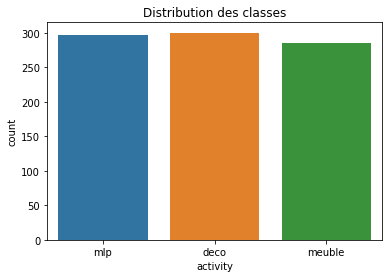

In [ ]:
# deuxieme méthode pour verifier la balance de nos classes
p = sns.countplot(df['activity'])
plt.title('Distribution des classes')
plt.show()

Les classes sont trés bien équilibrées

###Données numériques

####Matrice de correlation

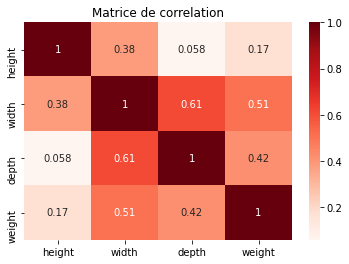

In [ ]:
sns.heatmap(df.corr(),annot=True, cmap = 'Reds')
plt.title('Matrice de correlation')
plt.show()

####  Quantiles des données

Permet de voir la distribution de la variable --WIDTH-- sur les 3 types de produits ( mlp, deco, meuble )

Text(0.5, 1.0, 'Distribution des classes sur la variable HEIGHT')

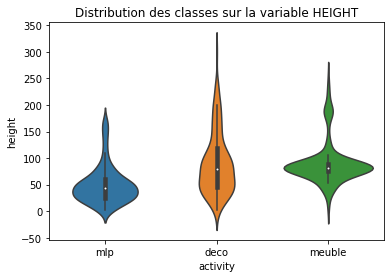

In [ ]:
# HEIGHT
ax = sns.violinplot(x="activity", y="height", data=df)
plt.title('Distribution des classes sur la variable HEIGHT')

Text(0.5, 1.0, 'Distribution des classes sur la variable WIDTH')

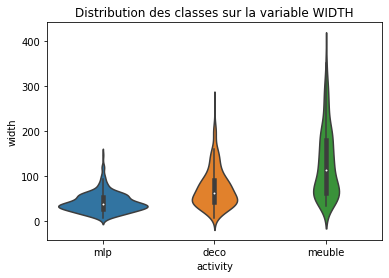

In [ ]:
# WIDTH
ax = sns.violinplot(x="activity", y="width", data=df)
plt.title('Distribution des classes sur la variable WIDTH')

Text(0.5, 1.0, 'Distribution des classes sur la variable DEPTH')

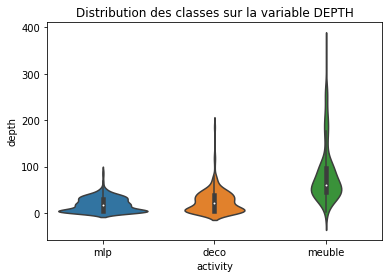

In [ ]:
# DEPTH
ax = sns.violinplot(x="activity", y="depth", data=df)
plt.title('Distribution des classes sur la variable DEPTH')

Text(0.5, 1.0, 'Distribution des classes sur la variable WEIGHT')

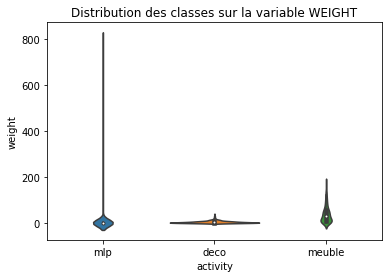

In [ ]:
# WEIGHT
ax = sns.violinplot(x="activity", y="weight", data=df)
plt.title('Distribution des classes sur la variable WEIGHT')

####PairPlot

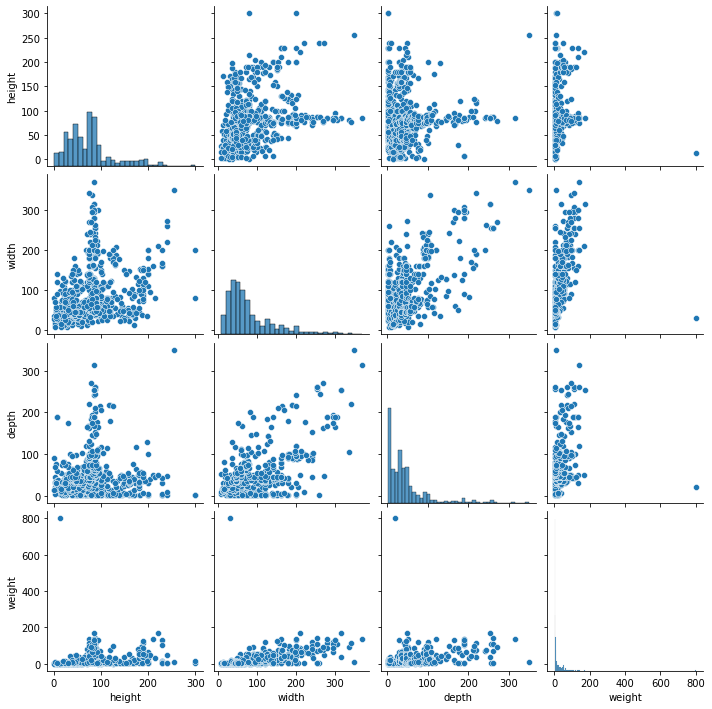

In [ ]:
#plot des paires
sns.pairplot(data = df)
plt.show()